In [1]:
import pandas as pd
import numpy as ns
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
bankdata=pd.read_csv("bank_cleaned.csv",sep=",",index_col=0)

In [4]:
bankdata.rename(columns={
    'age': 'age',
    'job': 'profession',
    'marital': 'situation_familiale',
    'education': 'niveau_etudes',
    'default': 'defaut_credit',
    'balance': 'solde_bancaire',
    'housing': 'pret_immobilier',
    'loan': 'pret_personnel',
    'day': 'jour_du_mois',
    'month': 'mois',
    'duration': 'duree_appel',
    'campaign': 'nb_appels',
    'pdays': 'nb_jours_depuis_dernier_appel',
    'previous': 'nb_appels_precedents',
    'poutcome': 'resultat_campagne_precedente',
    'response': 'reponse_campagne_actuelle',
    'response_binary': 'reponse_campagne_actuelle_binaire'
}, inplace=True)

In [5]:
print(bankdata.columns)

Index(['age', 'profession', 'situation_familiale', 'niveau_etudes',
       'defaut_credit', 'solde_bancaire', 'pret_immobilier', 'pret_personnel',
       'jour_du_mois', 'mois', 'duree_appel', 'nb_appels',
       'nb_jours_depuis_dernier_appel', 'nb_appels_precedents',
       'resultat_campagne_precedente', 'reponse_campagne_actuelle',
       'reponse_campagne_actuelle_binaire'],
      dtype='object')


In [8]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40841 entries, 0 to 45209
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                40841 non-null  int64  
 1   profession                         40841 non-null  object 
 2   situation_familiale                40841 non-null  object 
 3   niveau_etudes                      40841 non-null  object 
 4   defaut_credit                      40841 non-null  object 
 5   solde_bancaire                     40841 non-null  int64  
 6   pret_immobilier                    40841 non-null  object 
 7   pret_personnel                     40841 non-null  object 
 8   jour_du_mois                       40841 non-null  int64  
 9   mois                               40841 non-null  object 
 10  duree_appel                        40841 non-null  float64
 11  nb_appels                          40841 non-null  int64  


In [9]:
bankdata.describe(include='all')

,age,profession,situation_familiale,niveau_etudes,defaut_credit,solde_bancaire,pret_immobilier,pret_personnel,jour_du_mois,mois,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents,resultat_campagne_precedente,reponse_campagne_actuelle,reponse_campagne_actuelle_binaire
count,40841.000000,40841,40841,40841,40841,40841.000000,40841,40841,40841.000000,40841,40841.000000,40841.000000,40841.000000,40841.000000,40841,40841,40841.000000
unique,NaN,12,3,3,2,NaN,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2,NaN
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,NaN,may,NaN,NaN,NaN,NaN,unknown,no,NaN
freq,NaN,8805,24641,21933,40078,NaN,22820,34042,NaN,12496,NaN,NaN,NaN,NaN,34802,36202,NaN
mean,40.790676,NaN,NaN,NaN,NaN,1073.981807,NaN,NaN,15.863666,NaN,4.308949,2.774149,32.248304,0.436791,NaN,NaN,0.113587
std,10.475473,NaN,NaN,NaN,NaN,1712.556186,NaN,NaN,8.313608,NaN,4.305823,3.104177,90.738402,1.572342,NaN,NaN,0.317313
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,1.000000,NaN,0.100000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
25%,33.000000,NaN,NaN,NaN,NaN,64.000000,NaN,NaN,8.000000,NaN,1.730000,1.000000,-1.000000,0.000000,NaN,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,NaN,421.000000,NaN,NaN,16.000000,NaN,3.000000,2.000000,-1.000000,0.000000,NaN,NaN,0.000000
75%,48.000000,NaN,NaN,NaN,NaN,1333.000000,NaN,NaN,21.000000,NaN,5.300000,3.000000,-1.000000,0.000000,NaN,NaN,0.000000


In [15]:
bankdata.dtypes

age                                    int64
profession                            object
situation_familiale                   object
niveau_etudes                         object
defaut_credit                         object
solde_bancaire                         int64
pret_immobilier                       object
pret_personnel                        object
jour_du_mois                           int64
mois                                  object
duree_appel                          float64
nb_appels                              int64
nb_jours_depuis_dernier_appel          int64
nb_appels_precedents                   int64
resultat_campagne_precedente          object
reponse_campagne_actuelle             object
reponse_campagne_actuelle_binaire      int64
dtype: object

In [21]:
df_cat=bankdata.dtypes[bankdata.dtypes=='object'].index
df_num=bankdata.dtypes[bankdata.dtypes==('int64','float64')].index
print('categorical variables\n',df_cat)
print('numerical variables\n',df_num)

categorical variables
 Index(['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit',
       'pret_immobilier', 'pret_personnel', 'mois',
       'resultat_campagne_precedente', 'reponse_campagne_actuelle'],
      dtype='object')
numerical variables
 Index(['age', 'solde_bancaire', 'jour_du_mois', 'nb_appels',
       'nb_jours_depuis_dernier_appel', 'nb_appels_precedents',
       'reponse_campagne_actuelle_binaire'],
      dtype='object')


In [22]:
bankdata.isnull().sum()

age                                  0
profession                           0
situation_familiale                  0
niveau_etudes                        0
defaut_credit                        0
solde_bancaire                       0
pret_immobilier                      0
pret_personnel                       0
jour_du_mois                         0
mois                                 0
duree_appel                          0
nb_appels                            0
nb_jours_depuis_dernier_appel        0
nb_appels_precedents                 0
resultat_campagne_precedente         0
reponse_campagne_actuelle            0
reponse_campagne_actuelle_binaire    0
dtype: int64

In [23]:
bankdata_new=bankdata.drop(columns=['reponse_campagne_actuelle_binaire'])

In [25]:
cat_vars = bankdata[['profession', 'situation_familiale', 'niveau_etudes', 'defaut_credit', 'pret_immobilier', 'pret_personnel',
             'mois', 'resultat_campagne_precedente', 'reponse_campagne_actuelle', 'reponse_campagne_actuelle_binaire']]
cat_vars.head()

,profession,situation_familiale,niveau_etudes,defaut_credit,pret_immobilier,pret_personnel,mois,resultat_campagne_precedente,reponse_campagne_actuelle,reponse_campagne_actuelle_binaire
0,management,married,tertiary,no,yes,no,may,unknown,no,0
1,technician,single,secondary,no,yes,no,may,unknown,no,0
2,entrepreneur,married,secondary,no,yes,yes,may,unknown,no,0
5,management,married,tertiary,no,yes,no,may,unknown,no,0
6,management,single,tertiary,no,yes,yes,may,unknown,no,0


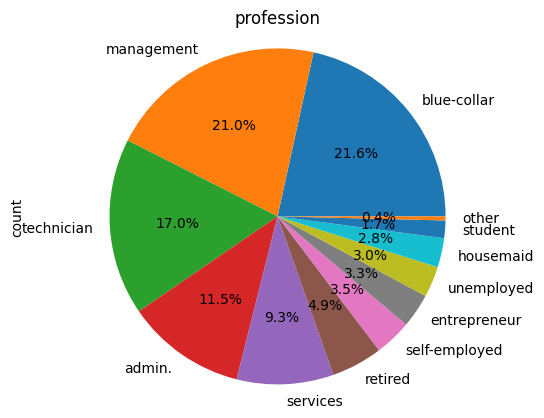

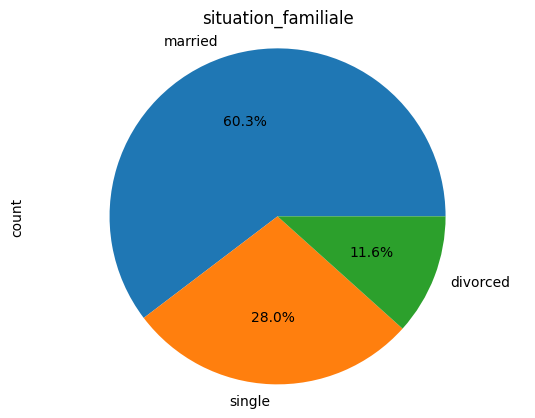

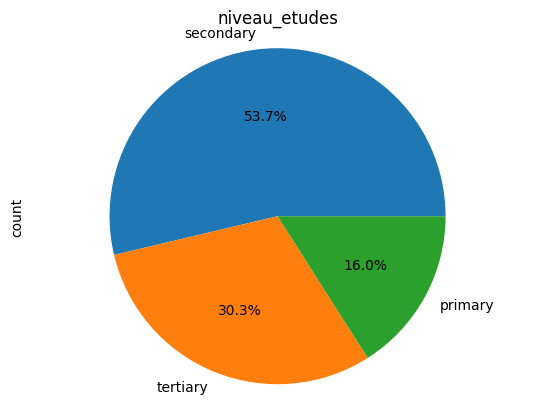

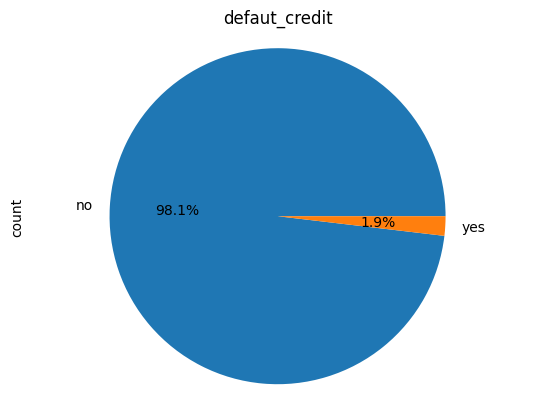

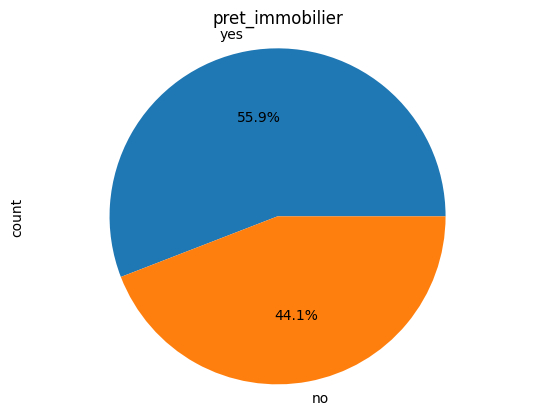

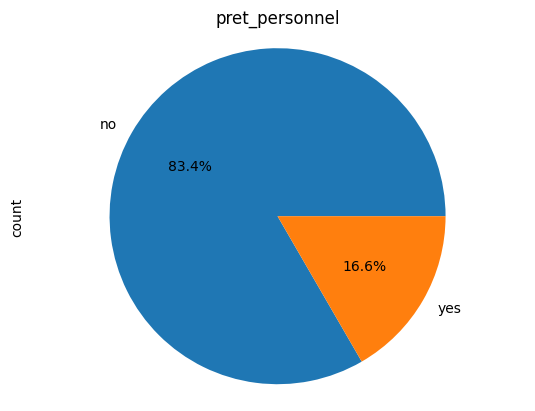

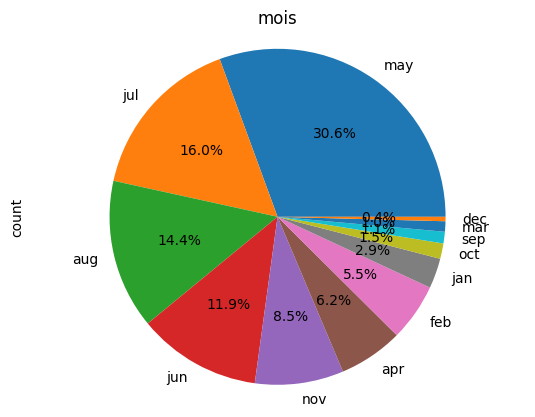

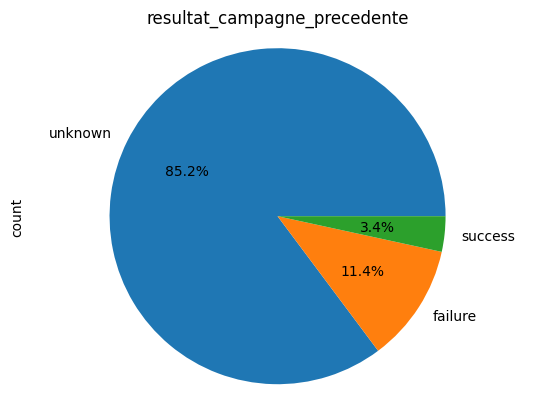

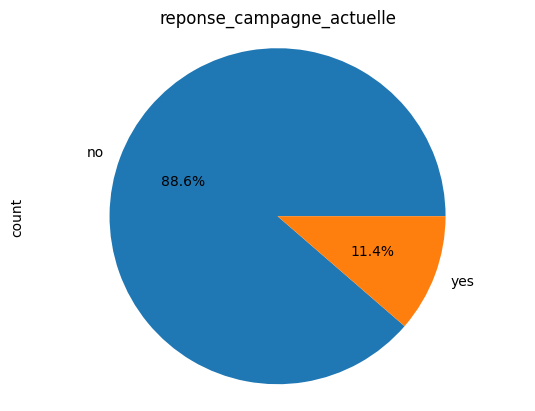

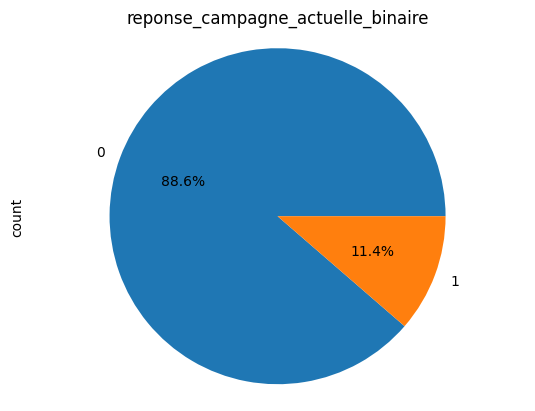

In [30]:
for var in cat_vars:
    cat_vars[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

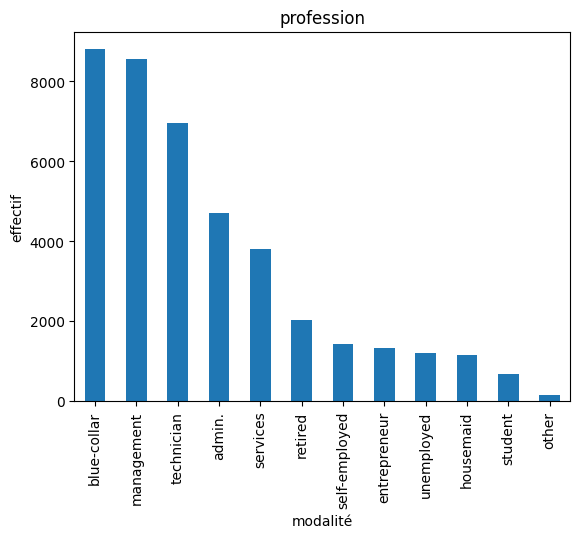

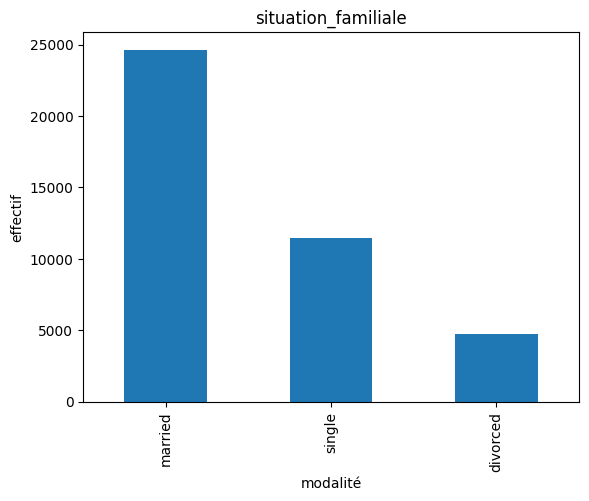

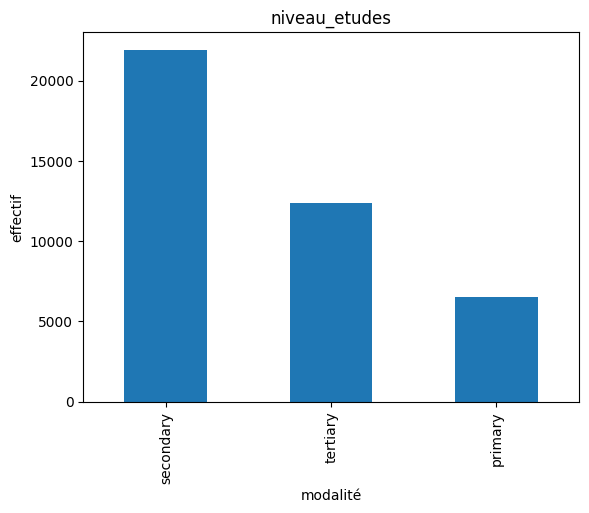

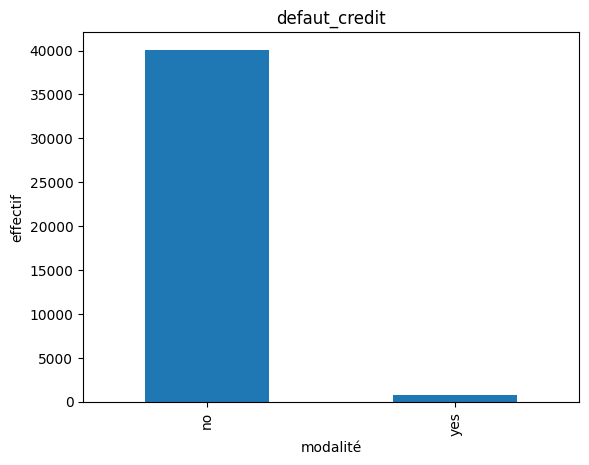

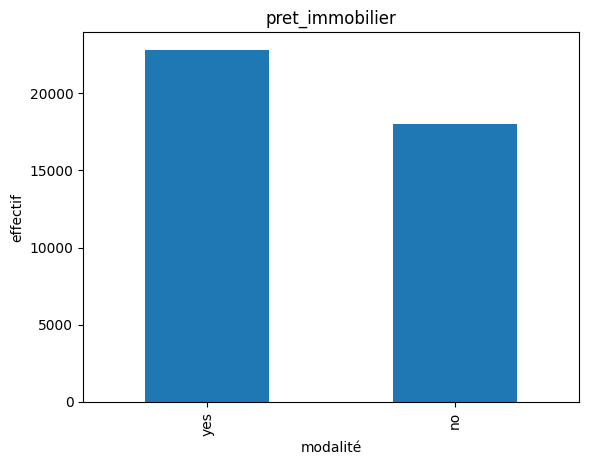

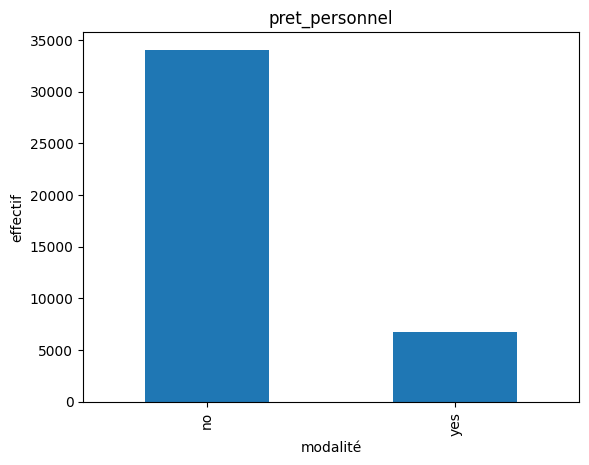

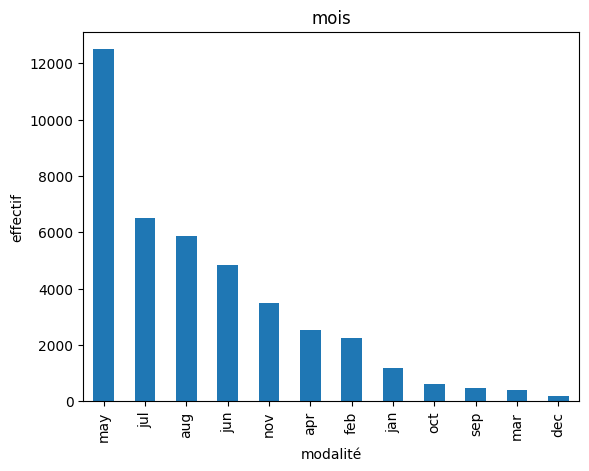

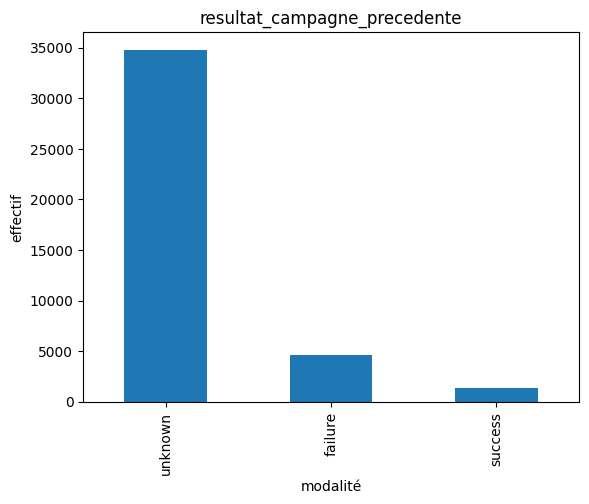

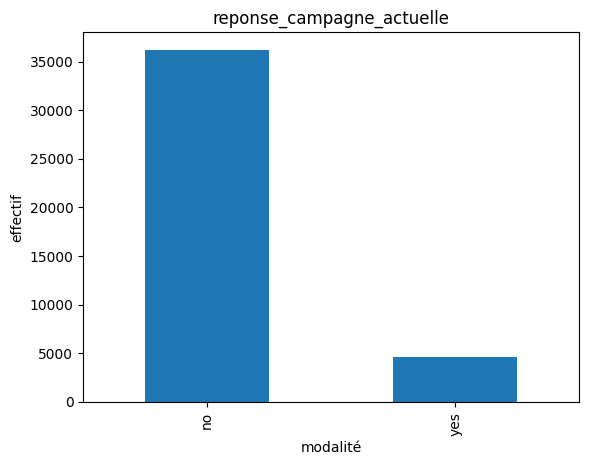

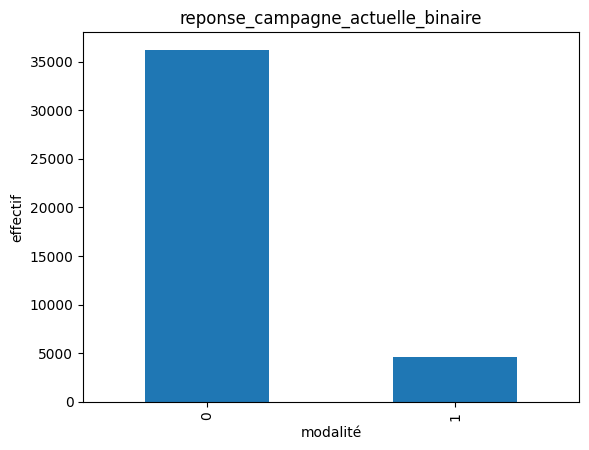

In [31]:
for var in cat_vars:
    cat_vars[var].value_counts().plot(kind='bar')
    plt.xlabel('modalité')
    plt.ylabel('effectif')
    plt.title(var)
    plt.show()

In [33]:
# Sélectionner les variables numériques
num_vars = bankdata[['age', 'solde_bancaire', 'duree_appel', 'nb_appels', 'nb_jours_depuis_dernier_appel', 'nb_appels_precedents']]
num_vars.head()

,age,solde_bancaire,duree_appel,nb_appels,nb_jours_depuis_dernier_appel,nb_appels_precedents
0,58,2143,4.35,1,-1,0
1,44,29,2.52,1,-1,0
2,33,2,1.27,1,-1,0
5,35,231,2.32,1,-1,0
6,28,447,3.62,1,-1,0


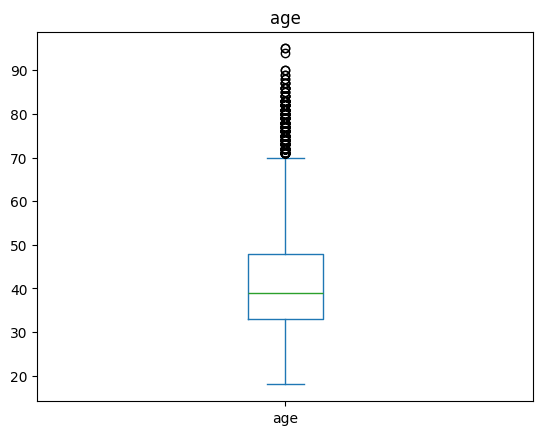

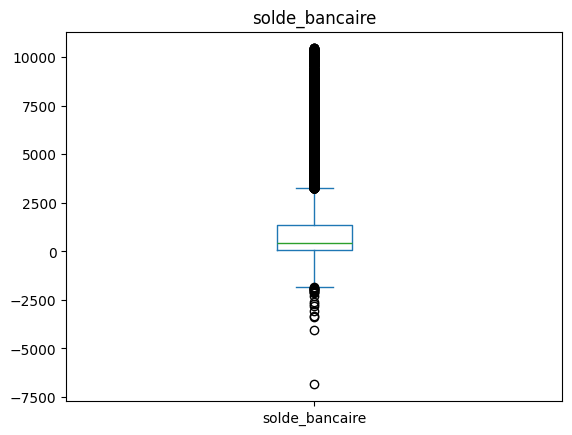

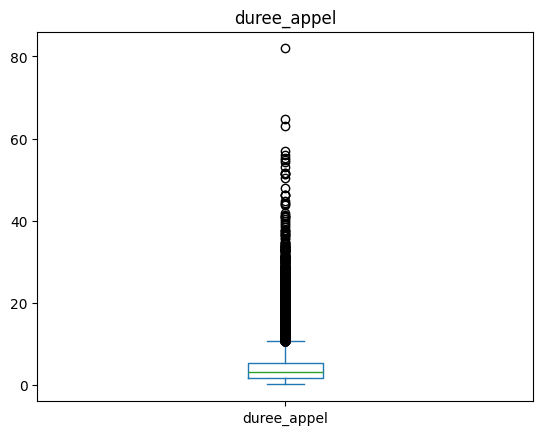

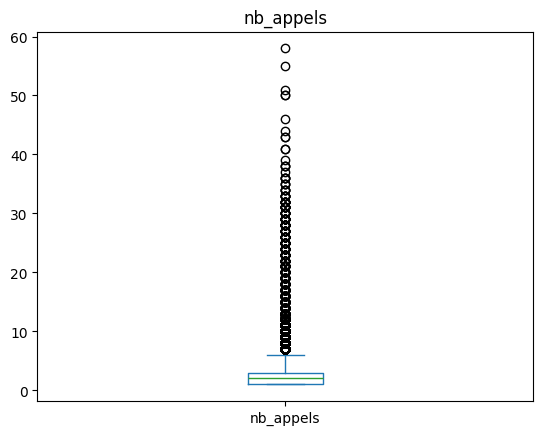

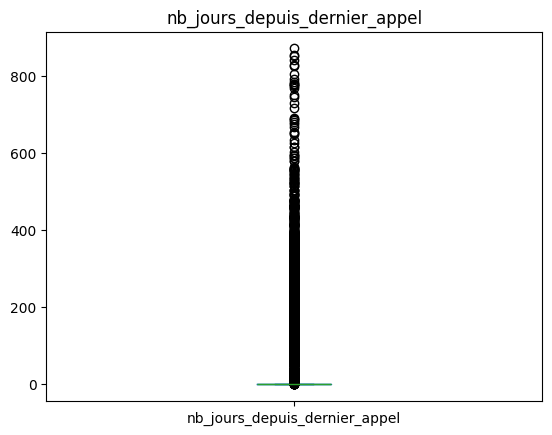

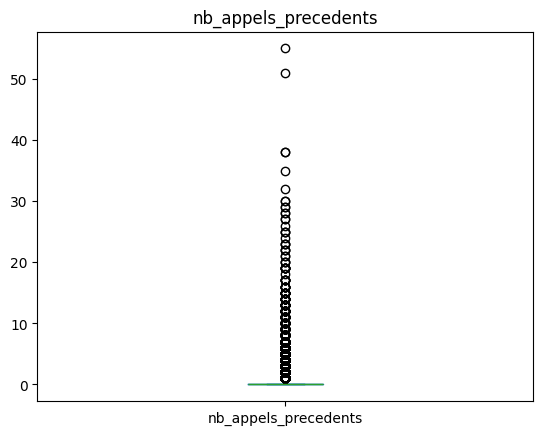

In [34]:
for var in num_vars:
    num_vars[var].plot(kind='box')
    plt.title(var)
    plt.show()

reponse_campagne_actuelle_binaire
0    36202
1     4639
Name: age, dtype: int64


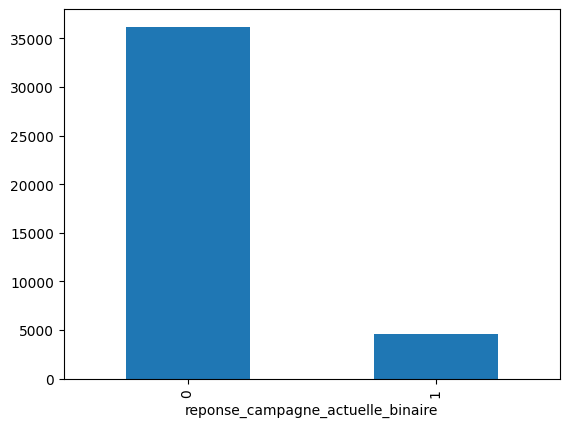

In [40]:
grouped=bankdata.groupby('reponse_campagne_actuelle_binaire')['age'].count()
print(grouped)
grouped.plot(kind='bar', stacked= True)
plt.show()

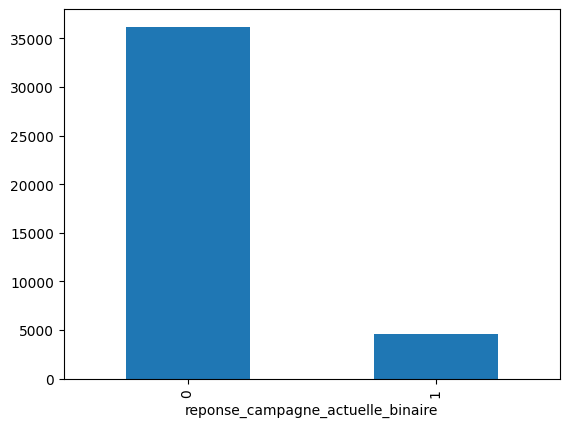

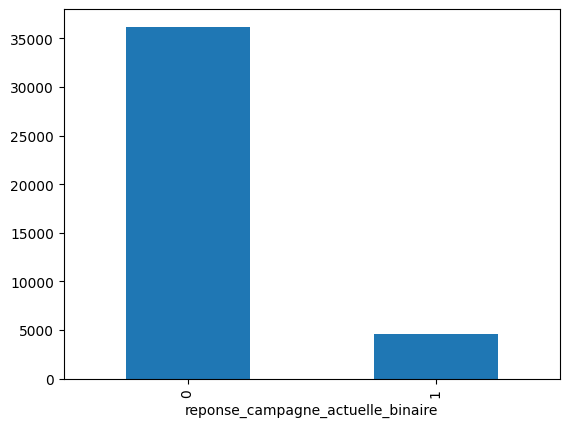

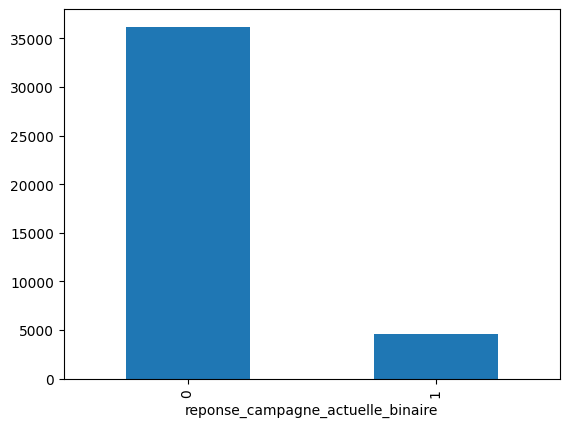

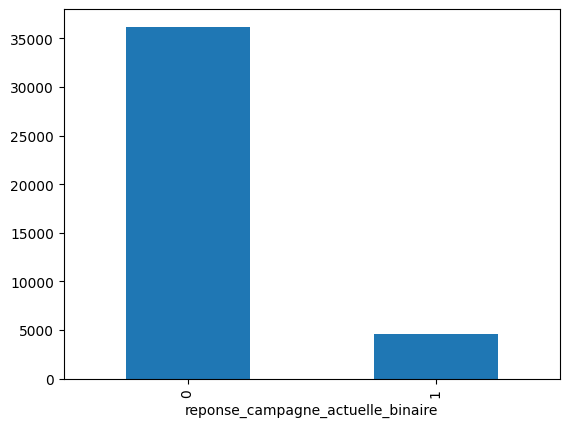

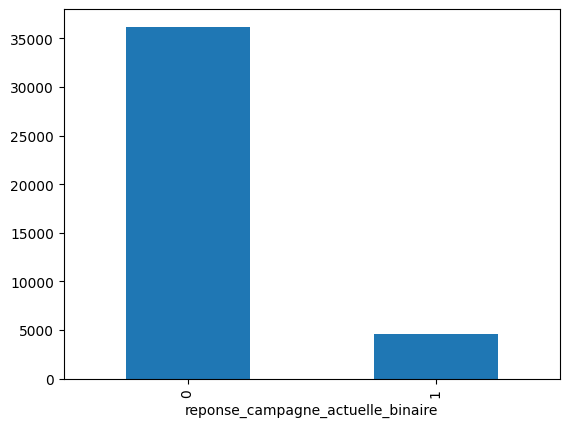

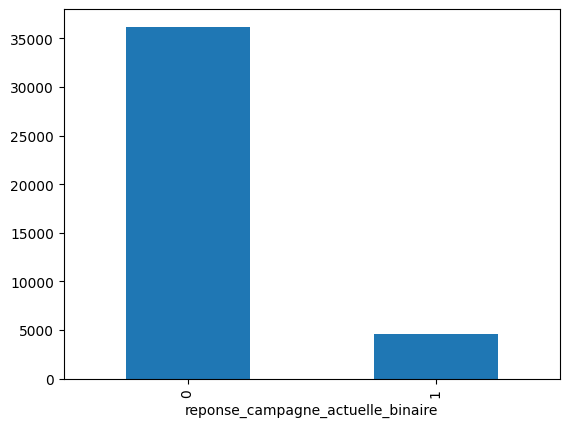

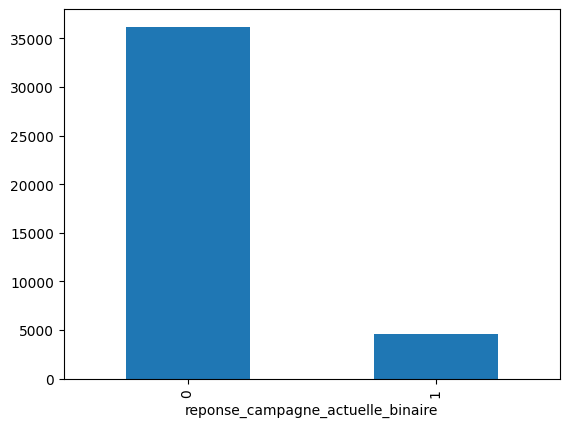

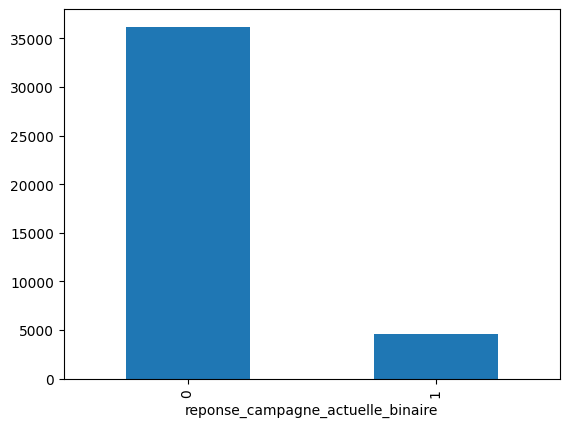

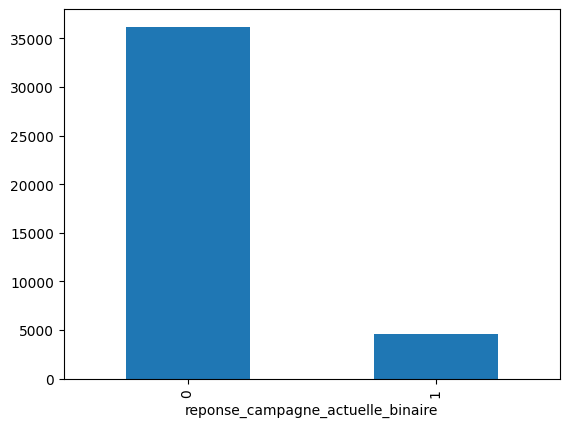

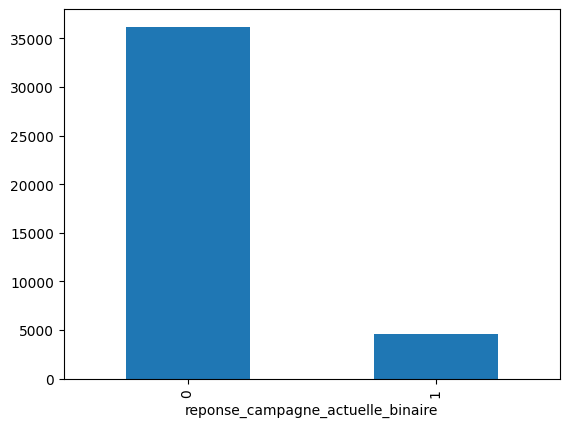

In [41]:
for var in cat_vars:
    bankdata.groupby('reponse_campagne_actuelle_binaire')[var].count().plot(kind='bar', stacked=True)
    plt.show()

In [ ]:
contingency_table = pd.crosstab(bankdata['reponse_campagne_actuelle_binaire'], bankdata[var])

AttributeError: 'str' object has no attribute 'items'

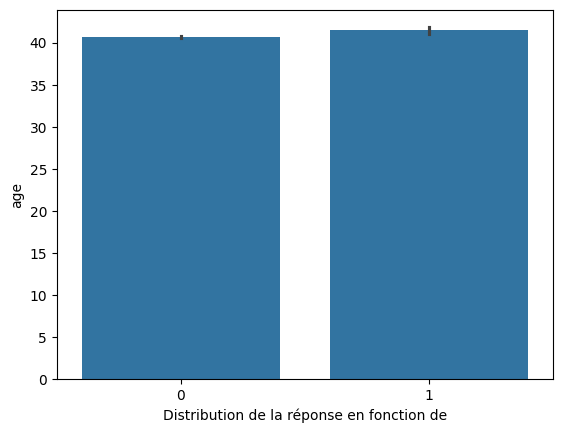

In [48]:
import seaborn as sns
for var in num_vars:
    sns.barplot(data=bankdata, x='reponse_campagne_actuelle_binaire', y=var)
    plt.xlabel('Distribution de la réponse en fonction de',var)
    plt.ylabel('modalité')
    plt.title(var)
    plt.show()

In [53]:
var_names = []
chi2_stats = []
p_values = []
cramer_vs = []
from scipy.stats import chi2_contingency
import numpy as np
# Parcourir toutes les variables catégorielles
for var in cat_vars:
    # Calculer le tableau de contingence
    contingency_table = pd.crosstab(bankdata['reponse_campagne_actuelle_binaire'], bankdata[var])
    # Calculer la statistique de test du Chi-deux et la p-valeur
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Calculer le coefficient V de Cramer
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r,k = contingency_table.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rc = r-((r-1)**2)/(n-1)
    kc = k-((k-1)**2)/(n-1)
    cramer_v = np.sqrt(phi2corr/min(rc-1,kc-1))
    # Ajouter les résultats aux listes correspondantes
    var_names.append(var)
    chi2_stats.append(chi2)
    p_values.append(p)
    cramer_vs.append(cramer_v)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Variable': var_names,
    'Chi2': chi2_stats,
    'P-valeur': p_values,
    'V de Cramer': cramer_vs
})


# Trier le DataFrame par ordre croissant de V de Cramer
results_df.sort_values(by='V de Cramer', inplace=True,ascending=False)

# Afficher le tableau des résultats
print(results_df)

                            Variable          Chi2       P-valeur  V de Cramer
9  reponse_campagne_actuelle_binaire  40831.068625   0.000000e+00     0.999878
8          reponse_campagne_actuelle  40831.068625   0.000000e+00     0.999878
7       resultat_campagne_precedente   4072.108164   0.000000e+00     0.315689
6                               mois   2864.452046   0.000000e+00     0.264328
4                    pret_immobilier    720.301364  1.151140e-158     0.132713
0                         profession    708.668621  7.474840e-145     0.130702
2                      niveau_etudes    210.723005   1.746147e-46     0.071489
1                situation_familiale    181.858771   3.234965e-40     0.066363
5                     pret_personnel    176.976953   2.215667e-40     0.065642
3                      defaut_credit     21.401052   3.725668e-06     0.022350
